In [11]:
from maze import Maze
from robot import Robot
from take_n_steps import take_n_steps
from visualizations import show_times_visited, show_multiple_path, show_step_count, print_maze
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [6]:
# 
first1_paths = []   #path taken up to goal on 1st run
second1_paths = []  #shortest path found based on above

first2_paths = []   #path taken up to goal and exploring maze afterward
second2_paths = []  #shortest path found based on above

# Create a maze and robots
testmaze = Maze("test_maze_01.txt")
testrobots = []
for run in range(100):
    testrobots.append(Robot(testmaze.dim))
    
# Perform 100 trials of the maze
for testrobot in testrobots:
    
    robot_pos = {'location': [0, 0], 'heading': 'u'}
    
    #find the goal
    while len(testrobot.path_taken) < 20000 and not testrobot.found_goal:
        robot_pos = take_n_steps(1, testmaze, testrobot, robot_pos)
    first1_paths.append(testrobot.path_taken_to_goal)
    second1_paths.append(testrobot.best_path)
    
    #continue exploring after the goal
    while len(testrobot.path_taken) < 1000 and not testrobot.finished_exploring:
        robot_pos = take_n_steps(1, testmaze, testrobot, robot_pos)
    first2_paths.append(testrobot.path_taken)
    second2_paths.append(testrobot.best_path)

#calculate the path lengths
first1_lengths = [len(x[1:]) for x in first1_paths]
first2_lengths = [len(x[1:]) for x in first2_paths]
second1_lengths = [len(x[1:]) for x in second1_paths]
second2_lengths = [len(x[1:]) for x in second2_paths]

#calculate the scores
scores1 = [first/30.0 + second for first,second in zip(first1_lengths,second1_lengths)]
scores2 = [first/30.0 + second for first,second in zip(first2_lengths,second2_lengths)]

#compile the results
results = {"first1":first1_lengths, 
           "second1":second1_lengths,
           "score1":scores1,
           "first2":first2_lengths, 
           "second2":second2_lengths,
           "score2":scores2}
df = pd.DataFrame(results)

In [7]:
df[['first1','second1','score1','first2','second2','score2']].describe()

,first1,second1,score1,first2,second2,score2
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,115.830000,18.44000,22.301000,128.650000,18.320000,22.608333
std,25.620799,1.50635,1.777560,26.725456,1.455606,1.820407
min,54.000000,17.00000,19.266667,64.000000,17.000000,19.700000
25%,99.750000,17.00000,20.783333,110.750000,17.000000,21.191667
50%,117.500000,18.00000,21.616667,129.000000,18.000000,21.850000
75%,133.750000,20.00000,24.341667,148.250000,20.000000,24.675000
max,182.000000,21.00000,25.266667,192.000000,21.000000,26.000000


In [8]:
#visualize the results
i = 90
show_multiple_path(testmaze,[testrobots[i].path_taken_to_goal,testrobots[i].path_taken_to_start]) 
show_times_visited(testmaze, testrobots[i].path_taken)
show_step_count(testmaze, testrobots[i].path_taken)

steps:161
                            LEFT                        
          0   1   2   3   4   5   6   7   8   9   10  11 
        +---+---+---+---+---+---+---+---+---+---+---+---+
     0  | 0           0   0   0   0   0   0             |
        +---+---    +---+---+---    +---    +---+---    +
     1  |           | 0   0   0   0   0 | 0   0   0     |
            +---            +---    +---+---+---    +---+
     2  | 0   0 |   | 0 | 0   0   0   0 | 0       0     |
                        +---    +---        +---+---+---+
     3  | 0 | 0       0 | 0   0   0   0 | 0   0   0     |
            +---+---+---    +---+---+---+---+---        +
     4  | 0   0   0 | 0   0   0   0   0   0   0 | 0 | 0 |
DOWN    +---+---            +---+---        +---        +  UP
     5  | 0   0   0   0 | 0 |     0 | 0 | 0   0 | 0 | 0 |
            +---                                        +
     6  | 0   0   0 | 0   0 |       | 0   0 | 0   0   0 |
        +---    +---    +---+---    +---        +---    +
 

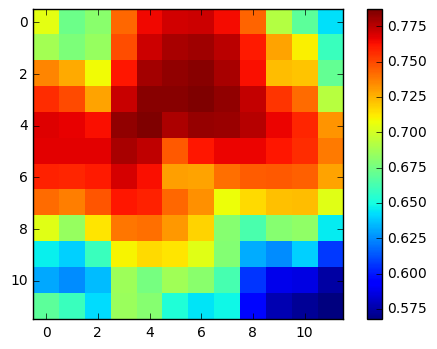

In [12]:
def find_loneliness_value(cell, times_visited):
    mat = np.zeros((testmaze.dim,testmaze.dim))
    visited_mat = np.zeros((testmaze.dim,testmaze.dim))
    for row in range(testmaze.dim):
        for col in range(testmaze.dim):
            mat[row][col] = 1.0/((abs(row - cell[0]) + abs(col - cell[1]))+1)
            if times_visited[row][col] > 0:
                visited_mat[row][col] = 1
    return np.sum(visited_mat*mat/np.sum(mat))

loneliness_mat = np.zeros((testmaze.dim,testmaze.dim))
for row in range(testmaze.dim):
    for col in range(testmaze.dim):
        loneliness_mat[row][col] = find_loneliness_value((row,col),testrobots[i].times_visited)
img = pyplot.imshow(loneliness_mat,interpolation='nearest')
pyplot.colorbar(img)
pyplot.show()

In [1]:
import tester
%run tester test_maze_04.txt

Starting run 0.
Ending first run. Starting next run.
Starting run 1.
Goal found; run 1 completed!
Task complete! Score: 27.467
